In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from rdfpy import rdf
sys.path.append('/home/hcleroy/PostDoc/Simulation/Aging_Condensates/Gillespie_backend/')
import Gillespie_backend as backend
from multiprocessing import Pool

In [2]:
def get_position(tmax,dtout,dtreset,S):
  """
  return the linear position of the linkers every dT until tmax
  """
  position = np.zeros((tmax//dtout)-1, dtype= object)
  linkers = np.zeros((tmax//dtout)-1,dtype=object)
  #Nloop = np.zeros(tmax//dt,dtype= int)
  for step in range(tmax):
      if step%dtout==0 and step!=0:
            #print(step)
          #Nloop[step//dt] = S.get_N_loop()
          position[step//dtout-1] = S.get_links_linear_position()
          linkers[step//dtout-1] = S.get_R()
      if step%dtreset == 0 and step!=0:
          S.reset_crosslinkers()
      S.evolve()
  return position,linkers

In [17]:
BindingEnergy = -10
ell_tot = 10000
#distance_anchor = 1000.
rho0 = 10.*10**-4
teq = 1000
t_compute = 1000
reset_linker_time = 100 # number of time per simulation the crosslinkers are reset
seed = 9898654

In [18]:
S = backend.Gillespie(ell_tot,rho0,BindingEnergy,seed)
#position,linkers = get_position(1000000,1000,1000,S)

: 

: 

In [ ]:
S.get_r().shape

(2088, 3)

In [12]:
S.evolve(steps=100)
S.reset_crosslinkers()

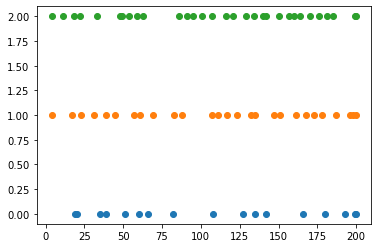

In [5]:
#for i in range(0,position.shape[0],10):
i=2
plt.scatter(position[i],[0 for _ in range(position[i].__len__())])
i=position.__len__()//2
plt.scatter(position[i],[1 for _ in range(position[i].__len__())])
i=-1
plt.scatter(position[i],[2 for _ in range(position[i].__len__())])
plt.show()

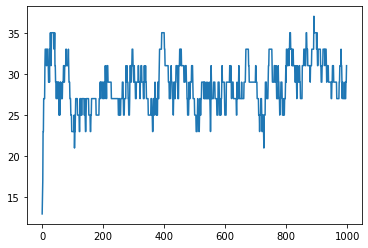

In [6]:
Nloop = np.array([p.__len__() for p in position])
plt.plot(np.arange(0,Nloop.__len__(),1),Nloop)

In [10]:
g0,r0 = rdf(position[0],dr=1)
g1,r1 = rdf(position[position.__len__()//2],dr=1)
g2,r2 = rdf(position[-1],dr=1)
plt.scatter(r0[1:],g0[1:],label='steps ')
plt.scatter(r1[1:],g1[1:])
plt.scatter(r2[1:],g2[1:])

AssertionError: particles should be an array of shape N x d, where N is                      the number of particles and d is the number of dimensions.

/home/hcleroy/anaconda3/lib/python3.8/site-packages/rdfpy/rdfpy.py:27: RuntimeWarning: invalid value encountered in double_scalars
  g_r_partial[r_idx] /= n_valid*shell_vol*rho
/home/hcleroy/anaconda3/lib/python3.8/site-packages/rdfpy/rdfpy.py:27: RuntimeWarning: invalid value encountered in double_scalars
  g_r_partial[r_idx] /= n_valid*shell_vol*rho


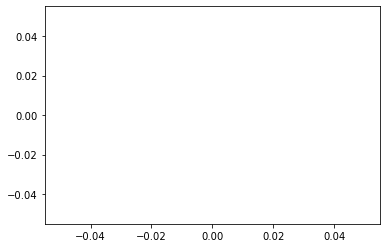

In [12]:
g0,r0 = rdf(linkers[0],dr=5)
g1,r1 = rdf(linkers[linkers.__len__()//2],dr=5)
g2,r2 = rdf(linkers[-1],dr=5)
plt.scatter(r0[1:],g0[1:],label='steps ')
plt.scatter(r1[1:],g1[1:])
plt.scatter(r2[1:],g2[1:])

In [11]:
S = backend.Gillespie(100,rho0,BindingEnergy,seed)

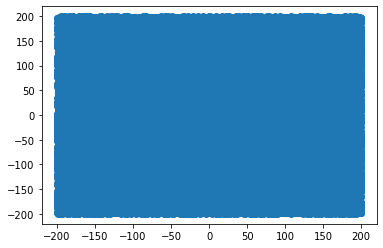

In [12]:
plt.scatter(S.get_r()[:,0],S.get_r()[:,1])

In [13]:
g_r, radii = rdf(S.get_r(), dr=1.)

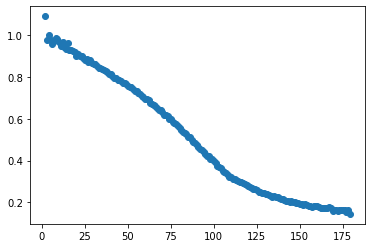

In [14]:
plt.scatter(radii[1:],g_r[1:])

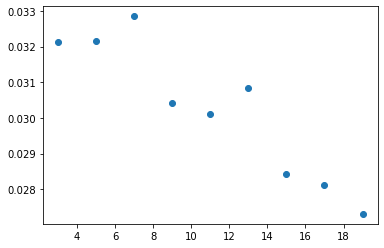

In [11]:

g0,r0 = S.compute_correlation_function(S.get_r(),distmax=20)

plt.scatter(r0[1:],g0[1:])

In [12]:
bind,time = S.evolve(steps=100)

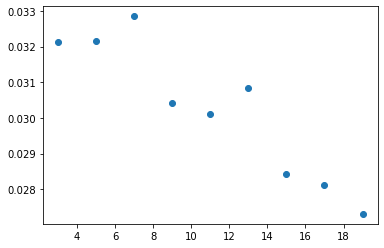

In [13]:

g0,r0 = S.compute_correlation_function(S.get_r(),distmax=20)

plt.scatter(r0[1:],g0[1:])

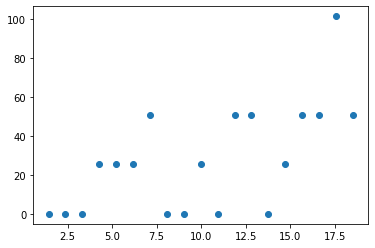

In [15]:
g0,r0 = S.compute_correlation_function(S.get_links_linear_position(),distmax=20,bins=20)
plt.scatter(r0[1:],g0[1:])